In [1]:
import pyvisa, time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rm = pyvisa.ResourceManager()
inst = rm.open_resource('ASRL4::INSTR', read_termination='\r', write_termination="\n", timeout=10000)


In [3]:
print(inst.query("*IDN?"))

KEITHLEY INSTRUMENTS INC.,MODEL 6487,4475696,B04   Jul 24 2017 15:26:56/A02  /C/J


In [19]:
def take_iv_sweep(start_volt, stop_volt, step_volt):
    delay = 0.2
    
    nsteps = int((stop_volt-start_volt)/step_volt)

    inst.write("*RST")
    inst.write("SOUR:VOLT:SWE:STAR %.3f"%start_volt)
    inst.write("SOUR:VOLT:SWE:STOP %.3f"%stop_volt)
    inst.write("SOUR:VOLT:SWE:STEP %.3f"%step_volt)
    inst.write("SOUR:VOLT:SWE:DEL %.2f"%delay)
    inst.write("ARM:COUN INF")
    inst.write("FORM:ELEM READ,VSO")
    inst.write("SOUR:VOLT:SWE:INIT")
    inst.write("SYST:ZCH OFF")
    inst.write(":INIT")

    time.sleep((delay + 0.4)*nsteps + 2)

    inst.write(":ABORT")
    inst.write(":TRAC:DATA?")

    data = inst.read()


    dvals = data.split(",")
    out_data = []
    for j in range(int(len(dvals)/2)):
        out_data.append([float(dvals[j*2 + 1]), float(dvals[j*2])])

    out_data = np.array(out_data)

    return(out_data)

[[2.000000e+01 2.824155e-09]
 [2.010000e+01 2.508083e-09]
 [2.020000e+01 2.406905e-09]
 [2.030000e+01 2.349626e-09]
 [2.040000e+01 2.310901e-09]
 [2.050000e+01 2.292078e-09]
 [2.060000e+01 2.271947e-09]
 [2.070000e+01 2.235601e-09]
 [2.080000e+01 2.228129e-09]
 [2.090000e+01 2.224548e-09]
 [2.100000e+01 2.213864e-09]
 [2.110000e+01 2.206049e-09]
 [2.120000e+01 2.208227e-09]
 [2.130000e+01 2.195528e-09]
 [2.140000e+01 2.196798e-09]
 [2.150000e+01 2.192495e-09]
 [2.160000e+01 2.193649e-09]
 [2.170000e+01 2.192726e-09]
 [2.180000e+01 2.192335e-09]
 [2.190000e+01 2.177543e-09]
 [2.200000e+01 2.223802e-09]
 [2.210000e+01 2.198061e-09]
 [2.220000e+01 2.228715e-09]
 [2.230000e+01 2.184800e-09]
 [2.240000e+01 2.199513e-09]
 [2.250000e+01 2.205449e-09]
 [2.260000e+01 2.204976e-09]
 [2.270000e+01 2.209704e-09]
 [2.280000e+01 2.206964e-09]
 [2.290000e+01 2.217138e-09]
 [2.300000e+01 2.218630e-09]
 [2.310000e+01 2.226700e-09]
 [2.320000e+01 2.227344e-09]
 [2.330000e+01 2.233808e-09]
 [2.340000e+01

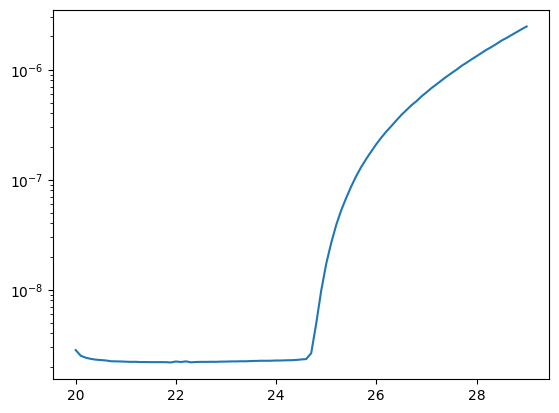

In [21]:
data = take_iv_sweep(20, 29, 0.1)

print(data)

plt.figure()
plt.semilogy(data[:,0], np.abs(data[:,1]))

plt.show()

6

In [6]:

inst.write(":ABORT")
inst.write(":TRAC:DATA?")
time.sleep(0.1)
data = inst.read()
print(data)

+7.363509E-12,+000.0000,+2.175404E-10,+000.2000,+3.172813E-10,+000.4000,+3.865950E-10,+000.6000,+4.592486E-10,+000.8000,+5.161256E-10,+001.0000
